In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

# import datetime class from datetime module

from datetime import datetime

In [2]:
# Load the Universal Bank Marketing Campaign (BMC) data

InsClaims = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\Hyper Parameter tuning\insurance_claims.csv", header=0)

# Copy the file to back-up

InsClaims_bk = InsClaims.copy()

# Display first 5 records

InsClaims.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014/10/17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015/01/25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006/06/27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015/01/21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000/09/06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015/02/22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990/05/25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015/01/10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014/06/06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015/02/17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
# Displaying the variables information

InsClaims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [4]:
# Delete the variable '_c39'

del InsClaims['_c39']

In [5]:
# Display the column name of dataset

InsClaims.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [6]:
# Replace target variable 'police_report_available', 'Yes' to 1 , 'No' to 0 and '?' to 0  & convert values to integer.

InsClaims['fraud_reported'] = InsClaims['fraud_reported'].str.replace('Y', '1')
InsClaims['fraud_reported'] = InsClaims['fraud_reported'].str.replace('N', '0')
InsClaims['fraud_reported'] = InsClaims['fraud_reported'].astype(int)

In [7]:
# Count the target or dependent variable by '0' & '1' and 
# their proportion (> 10 : 1, then the dataset is imbalance dataset)

Target_count = InsClaims.fraud_reported.value_counts()
print('Class 0:', Target_count[0])
print('Class 1:', Target_count[1])
print('Proportion:', round(Target_count[0] / Target_count[1], 2), ': 1')
print('Total loans Trans:', len(InsClaims))

Class 0: 753
Class 1: 247
Proportion: 3.05 : 1
Total loans Trans: 1000


In [8]:
# Displaying Duplicate values with in Loan ataset, if avialble

InsClaims_dup = InsClaims[InsClaims.duplicated(keep='last')]
InsClaims_dup

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported


In [9]:
# Display the missing values of different variables

InsClaims.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [10]:
# Convert the 'incident_date' and 'policy_bind_date' columns to datetime format

InsClaims['incident_date']= pd.to_datetime(InsClaims['incident_date'])
InsClaims['policy_bind_date']= pd.to_datetime(InsClaims['policy_bind_date'])

In [11]:
# Display the Max & Min number of months

print(InsClaims.months_as_customer.max())
print(InsClaims.months_as_customer.min())

479
0


In [12]:
# Create ranges for months_as_customer variable

InsClaims['Range-mac'] = pd.cut(x=InsClaims['months_as_customer'], bins=[-1, 20, 40, 60, 80, 100, 500],
                                labels=['0 to 20', '21 to 40', '41 to 60', '61 to 80', '81 to 100', '101 to 500'])

In [13]:
# Display the unique values counts of 'policy_state' variable 

InsClaims['policy_state'].value_counts(sort=False)

OH    352
IN    310
IL    338
Name: policy_state, dtype: int64

In [14]:
# Convert the 'policy_state' into integer value

InsClaims['policy_state'] = InsClaims['policy_state'].str.replace('OH', '1')
InsClaims['policy_state'] = InsClaims['policy_state'].str.replace('IN', '2')
InsClaims['policy_state'] = InsClaims['policy_state'].str.replace('IL', '3')
InsClaims['policy_state'] = InsClaims['policy_state'].astype(int)

In [15]:
# Display the unique values counts of 'policy_csl' variable 

InsClaims['policy_csl'].value_counts(sort=False)

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

In [16]:
# Convert th 'policy_csl' into integer value

InsClaims['policy_csl'] = InsClaims['policy_csl'].str.replace('100/300', '1')
InsClaims['policy_csl'] = InsClaims['policy_csl'].str.replace('250/500', '2')
InsClaims['policy_csl'] = InsClaims['policy_csl'].str.replace('500/1000', '3')
InsClaims['policy_csl'] = InsClaims['policy_csl'].astype(int)

In [17]:
# Display the unique values counts of 'insured_education_level' variable 

InsClaims['insured_education_level'].value_counts(sort=False)

MD             144
PhD            125
Associate      145
Masters        143
High School    160
College        122
JD             161
Name: insured_education_level, dtype: int64

In [18]:
# Convert the 'insured_education_level' into interger 

InsClaims['insured_education_level'] = InsClaims['insured_education_level'].str.replace('High School', '1')
InsClaims['insured_education_level'] = InsClaims['insured_education_level'].str.replace('College', '2')
InsClaims['insured_education_level'] = InsClaims['insured_education_level'].str.replace('Associate', '3')
InsClaims['insured_education_level'] = InsClaims['insured_education_level'].str.replace('JD', '3')
InsClaims['insured_education_level'] = InsClaims['insured_education_level'].str.replace('Masters', '4')
InsClaims['insured_education_level'] = InsClaims['insured_education_level'].str.replace('MD', '4')
InsClaims['insured_education_level'] = InsClaims['insured_education_level'].str.replace('PhD', '5')
InsClaims['insured_education_level'] = InsClaims['insured_education_level'].astype(int)

In [19]:
# Convert the 'insured_relationship' into interger 

InsClaims['insured_relationship'].value_counts(sort=False)

husband           170
other-relative    177
own-child         183
unmarried         141
wife              155
not-in-family     174
Name: insured_relationship, dtype: int64

In [20]:
# Convert the 'insured_relationship' into integer

InsClaims['insured_relationship'] = InsClaims['insured_relationship'].str.replace('own-child', '1')
InsClaims['insured_relationship'] = InsClaims['insured_relationship'].str.replace('other-relative', '1')
InsClaims['insured_relationship'] = InsClaims['insured_relationship'].str.replace('husband', '1')
InsClaims['insured_relationship'] = InsClaims['insured_relationship'].str.replace('wife', '1')
InsClaims['insured_relationship'] = InsClaims['insured_relationship'].str.replace('not-in-family', '2')
InsClaims['insured_relationship'] = InsClaims['insured_relationship'].str.replace('unmarried', '2')
InsClaims['insured_relationship'] = InsClaims['insured_relationship'].astype(int)

In [21]:
# Convert the 'umbrella_limit' into integer

InsClaims['umbrella_limit'].value_counts(sort=False)

 0           798
 5000000      46
 6000000      57
 4000000      39
 3000000      12
 8000000       8
 7000000      29
 9000000       5
 10000000      2
-1000000       1
 2000000       3
Name: umbrella_limit, dtype: int64

In [22]:
# Convert the 'umbrella_limit' variable into numeric 

InsClaims['umbrella_limit'] = InsClaims['umbrella_limit'].replace([-1000000], 1)
InsClaims['umbrella_limit'] = InsClaims['umbrella_limit'].replace([2000000], 2)
InsClaims['umbrella_limit'] = InsClaims['umbrella_limit'].replace([3000000], 3)
InsClaims['umbrella_limit'] = InsClaims['umbrella_limit'].replace([4000000], 4)
InsClaims['umbrella_limit'] = InsClaims['umbrella_limit'].replace([5000000], 5)
InsClaims['umbrella_limit'] = InsClaims['umbrella_limit'].replace([6000000], 6)
InsClaims['umbrella_limit'] = InsClaims['umbrella_limit'].replace([7000000], 7)
InsClaims['umbrella_limit'] = InsClaims['umbrella_limit'].replace([8000000], 8)
InsClaims['umbrella_limit'] = InsClaims['umbrella_limit'].replace([9000000], 9)
InsClaims['umbrella_limit'] = InsClaims['umbrella_limit'].replace([10000000], 10)

In [23]:
# Create capital gains ranges

InsClaims['CG_Range'] = pd.cut(x=InsClaims['capital-gains'], bins=[-1, 1, 10000, 20000, 30000, 40000, 50000, 
                                                                   75000, 105000],
                               labels=['0', '< 10K', '10K TO 20K', '20K TO 30K', '30K TO 40K', '40K TO 50K', 
                                       '50K TO 75K', '> 75K' ])

In [24]:
# Create capital losses ranges

InsClaims['CL_Range'] = pd.cut(x=InsClaims['capital-loss'], bins=[-115000, -75000, -50000, -40000, 
                                                                  -30000, -20000, -10000, -1, 1],
                               labels=['> -75K', '-50K TO -75K', '-40K TO -50K', '-30K TO -40K',
                                       '-20K TO -30K', '-10K TO -20K', '< -10K', '0'])

In [25]:
# Display the unique values counts of 'incident_type' variable

InsClaims['incident_type'].value_counts(sort=False)

Single Vehicle Collision    403
Vehicle Theft                94
Multi-vehicle Collision     419
Parked Car                   84
Name: incident_type, dtype: int64

In [26]:
# Convert the 'incident_type' to intergers

InsClaims['incident_type'] = InsClaims['incident_type'].str.replace('Parked Car', '1')
InsClaims['incident_type'] = InsClaims['incident_type'].str.replace('Single Vehicle Collision', '2')
InsClaims['incident_type'] = InsClaims['incident_type'].str.replace('Multi-vehicle Collision', '3')
InsClaims['incident_type'] = InsClaims['incident_type'].str.replace('Vehicle Theft', '4')
InsClaims['incident_type'] = InsClaims['incident_type'].astype(int)

In [27]:
# Display the unique values counts of 'collision_type' variable 

InsClaims['collision_type'].value_counts(sort=False)

Side Collision     276
?                  178
Rear Collision     292
Front Collision    254
Name: collision_type, dtype: int64

In [28]:
# Convert the 'collision_type' to intergers

InsClaims['collision_type'] = InsClaims['collision_type'].str.replace('Rear Collision', '1')
InsClaims['collision_type'] = InsClaims['collision_type'].str.replace('?', '1')
InsClaims['collision_type'] = InsClaims['collision_type'].str.replace('Side Collision', '2')
InsClaims['collision_type'] = InsClaims['collision_type'].str.replace('Front Collision', '3')
InsClaims['collision_type'] = InsClaims['collision_type'].astype(int)

In [29]:
# Display the unique values counts of 'incident_severity'' variable 

InsClaims['incident_severity'].value_counts(sort=False)

Major Damage      276
Minor Damage      354
Total Loss        280
Trivial Damage     90
Name: incident_severity, dtype: int64

In [30]:
# Convert the 'incident_severity' to intergers

InsClaims['incident_severity'] = InsClaims['incident_severity'].str.replace('Minor Damage', '1')
InsClaims['incident_severity'] = InsClaims['incident_severity'].str.replace('Trivial Damage', '2')
InsClaims['incident_severity'] = InsClaims['incident_severity'].str.replace('Major Damage', '3')
InsClaims['incident_severity'] = InsClaims['incident_severity'].str.replace('Total Loss', '4')
InsClaims['incident_severity'] = InsClaims['incident_severity'].astype(int)

In [31]:
# Display the unique values counts of 'authorities_contacted'' variable 

InsClaims['authorities_contacted'].value_counts(sort=False)

Police       292
None          91
Fire         223
Other        198
Ambulance    196
Name: authorities_contacted, dtype: int64

In [32]:
# Convert the 'authorities_contacted' to intergers

InsClaims['authorities_contacted'] = InsClaims['authorities_contacted'].str.replace('Police', '1')
InsClaims['authorities_contacted'] = InsClaims['authorities_contacted'].str.replace('Fire', '2')
InsClaims['authorities_contacted'] = InsClaims['authorities_contacted'].str.replace('Ambulance', '3')
InsClaims['authorities_contacted'] = InsClaims['authorities_contacted'].str.replace('Other', '4')
InsClaims['authorities_contacted'] = InsClaims['authorities_contacted'].str.replace('None', '4')
InsClaims['authorities_contacted'] = InsClaims['authorities_contacted'].astype(int)

In [33]:
# convert 'incident_hour_of_the_day' into ranges

InsClaims['Incident_Hour_Range'] = pd.cut(x=InsClaims['incident_hour_of_the_day'], bins=[-1, 4, 8, 12, 16, 20, 24],
                                labels=['12:00 AM to 04:00 AM', '04:00 AM to 08:00 AM', '08:00 AM to 12:00 PM', 
                                        '12:00 PM to 04:00 PM', '04:00 PM to 08:00 PM', '08:00 PM to 12:00 AM'])

In [34]:
# Display the unique values counts of 'property_damage' variable 

InsClaims['property_damage'].value_counts(sort=False)

YES    302
?      360
NO     338
Name: property_damage, dtype: int64

In [35]:
# Convert 'property_damage' into integers

InsClaims['property_damage'] = InsClaims['property_damage'].str.replace('NO', '0')
InsClaims['property_damage'] = InsClaims['property_damage'].str.replace('YES', '1')
InsClaims['property_damage'] = InsClaims['property_damage'].str.replace('?', '0')
InsClaims['property_damage'] = InsClaims['property_damage'].astype(int)

In [36]:
# Display the unique values counts of 'police_report_available' variable 

InsClaims['police_report_available'].value_counts(sort=False)

YES    314
?      343
NO     343
Name: police_report_available, dtype: int64

In [37]:
# Convert 'police_report_available' into integers

InsClaims['police_report_available'] = InsClaims['police_report_available'].str.replace('NO', '2')
InsClaims['police_report_available'] = InsClaims['police_report_available'].str.replace('YES', '1')
InsClaims['police_report_available'] = InsClaims['police_report_available'].str.replace('?', '2')
InsClaims['police_report_available'] = InsClaims['police_report_available'].astype(int)

In [38]:
# Copy to new file which will used for classification analysis

InsClaimsF1 = InsClaims.copy()

In [39]:
# Display the variables

InsClaimsF1.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'Range-mac', 'CG_Range',
       'CL_Range', 'Incident_Hour_Range'],
      dtype='object')

In [40]:
# Dropping the variables which are impacting the target variable

InsClaimsF1 = InsClaimsF1.drop(['policy_number', 'months_as_customer', 'policy_bind_date', 'insured_zip',
                                'insured_occupation', 'insured_hobbies', 'capital-gains', 'capital-loss',
                                'incident_date', 'incident_state', 'incident_city', 'incident_location',
                                'incident_hour_of_the_day', 'auto_make', 'auto_model', 'auto_year'], axis=1)

In [41]:
# Display the data information

InsClaimsF1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   age                          1000 non-null   int64   
 1   policy_state                 1000 non-null   int32   
 2   policy_csl                   1000 non-null   int32   
 3   policy_deductable            1000 non-null   int64   
 4   policy_annual_premium        1000 non-null   float64 
 5   umbrella_limit               1000 non-null   int64   
 6   insured_sex                  1000 non-null   object  
 7   insured_education_level      1000 non-null   int32   
 8   insured_relationship         1000 non-null   int32   
 9   incident_type                1000 non-null   int32   
 10  collision_type               1000 non-null   int32   
 11  incident_severity            1000 non-null   int32   
 12  authorities_contacted        1000 non-null   int32   
 13  numb

In [42]:
# Create dummy variable for all range values

InsClaimsF1 = pd.get_dummies(InsClaimsF1, columns=['Range-mac', 'CG_Range', 'CL_Range', 
                                                   'Incident_Hour_Range', 'insured_sex'])
InsClaimsF1.head().T

,0,1,2,3,4
age,48.00,42.00,29.00,41.00,44.00
policy_state,1.00,2.00,1.00,3.00,3.00
policy_csl,2.00,2.00,1.00,2.00,3.00
policy_deductable,1000.00,2000.00,2000.00,2000.00,1000.00
policy_annual_premium,1406.91,1197.22,1413.14,1415.74,1583.91
umbrella_limit,0.00,5.00,5.00,6.00,6.00
insured_education_level,4.00,4.00,5.00,5.00,3.00
insured_relationship,1.00,1.00,1.00,2.00,2.00
incident_type,2.00,4.00,3.00,2.00,4.00
collision_type,2.00,1.00,1.00,3.00,1.00


In [43]:
# Identify the independent and Target variables

IndepVar = []
for col in InsClaimsF1.columns:
    if col != 'fraud_reported':
        IndepVar.append(col)

TargetVar = 'fraud_reported'

x = InsClaimsF1[IndepVar]
y = InsClaimsF1[TargetVar]

In [44]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)
x_test_F1 = x_test.copy()

In [45]:
# Feature Scaling - Each independent variable is in different range. The process of transforming all the 
# features in the given data set to a fixed range is known as ‘Scaling’

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Conver x_train values

x_train['age'] = sc.fit_transform(x_train['age'].values.reshape(-1, 1))
x_train['policy_annual_premium'] = sc.fit_transform(x_train['policy_annual_premium'].values.reshape(-1, 1))
x_train['total_claim_amount'] = sc.fit_transform(x_train['total_claim_amount'].values.reshape(-1, 1))
x_train['injury_claim'] = sc.fit_transform(x_train['injury_claim'].values.reshape(-1, 1))
x_train['property_claim'] = sc.fit_transform(x_train['property_claim'].values.reshape(-1, 1))
x_train['vehicle_claim'] = sc.fit_transform(x_train['vehicle_claim'].values.reshape(-1, 1))

# Conver x_test values

x_test['age'] = sc.fit_transform(x_test['age'].values.reshape(-1, 1))
x_test['policy_annual_premium'] = sc.fit_transform(x_test['policy_annual_premium'].values.reshape(-1, 1))
x_test['total_claim_amount'] = sc.fit_transform(x_test['total_claim_amount'].values.reshape(-1, 1))
x_test['injury_claim'] = sc.fit_transform(x_test['injury_claim'].values.reshape(-1, 1))
x_test['property_claim'] = sc.fit_transform(x_test['property_claim'].values.reshape(-1, 1))
x_test['vehicle_claim'] = sc.fit_transform(x_test['vehicle_claim'].values.reshape(-1, 1))

# Convert to dataframes

x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [48]:
# Load the Hyperparameter tunining result dataset

HTResults = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\Hyper Parameter tuning\HTResults.csv", header=0)
HTResults.head()

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# KNN Algorithm with default hyper parameters

Confusion matrix : 
 [[  7  73]
 [ 20 200]]
Outcome values : 
 7 73 20 200
Classification report : 
               precision    recall  f1-score   support

           1       0.26      0.09      0.13        80
           0       0.73      0.91      0.81       220

    accuracy                           0.69       300
   macro avg       0.50      0.50      0.47       300
weighted avg       0.61      0.69      0.63       300

Accuracy : 69.0 %
Precision : 25.9 %
Recall : 8.8 %
F1 Score : 0.131
Specificity or True Negative Rate : 90.9 %
Balanced Accuracy : 49.8 %
MCC : -0.005
roc_auc_score: 0.498


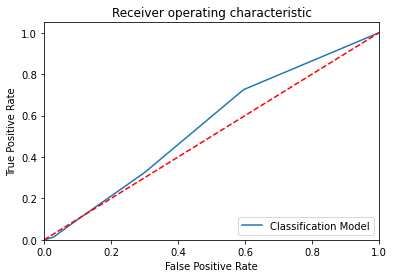

-----------------------------------------------------------------------------------------------------


In [49]:
# To build the 'Logistic Regression' model with random sampling

from sklearn.neighbors import KNeighborsClassifier

# Create model object

ModelKNN = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, 
                                p=2, metric='minkowski', metric_params=None, n_jobs=None)

# Fit the model

ModelKNN.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelKNN.predict(x_test)

# confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelKNN.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelKNN,
           'True Positive': tp,
           'False Negative': fn, 
           'False Positive': fp, 
           'True Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
HTResults = HTResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

In [50]:
HTResults.head()

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(),7,73,20,200,0.69,0.259,0.088,0.131,0.909,-0.005,0.498295,0.498


# KNN - Hyperparametr tuning with RandomizedSearchCV

In [51]:
# Hyperparametr tuning with RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

# K values

n_neighbors = [int(x) for x in np.linspace(1, 21, 20)]

# Distance metrics (metric) for choosing the composition of the neighborhood

metric = ['euclidean', 'manhattan', 'minkowski']

# members of the neighborhood via different weightings (weights)

weights = ['uniform', 'distance']

# To compute the nearest neighbors

algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

# Create the random grid

Random_Grid = {'n_neighbors': n_neighbors,
               'metric': metric,
               'weights': weights,
               'algorithm': algorithm
              }

print(Random_Grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21], 'metric': ['euclidean', 'manhattan', 'minkowski'], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}


In [52]:
# prepare the cross-validation procedure

from sklearn.model_selection import RepeatedKFold

RKCV = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [53]:
ModelKNN = KNeighborsClassifier(n_neighbors=5)

ModelKNN_RandomCV=RandomizedSearchCV(estimator=ModelKNN, param_distributions=Random_Grid, n_iter=100, cv=RKCV, verbose=2,
                                     random_state=100, n_jobs=-1)
# Fit the randomized model

ModelKNN_RandomCV.fit(x_train,y_train)

Fitting 30 folds for each of 100 candidates, totalling 3000 fits


RandomizedSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
                   estimator=KNeighborsClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19,
                                                        21],
                                        'weights': ['uniform', 'distance']},
                   random_state=100, verbose=2)

In [54]:
# best or the optimal values of the parameters for which the model performed the best

ModelKNN_RandomCV.best_params_

{'weights': 'uniform',
 'n_neighbors': 16,
 'metric': 'manhattan',
 'algorithm': 'ball_tree'}

Confusion matrix : 
 [[  0  80]
 [  6 214]]
Outcome values : 
 0 80 6 214
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        80
           0       0.73      0.97      0.83       220

    accuracy                           0.71       300
   macro avg       0.36      0.49      0.42       300
weighted avg       0.53      0.71      0.61       300

Accuracy : 71.3 %
Precision : 0.0 %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 97.3 %
Balanced Accuracy : 48.6 %
MCC : -0.086
roc_auc_score: 0.486


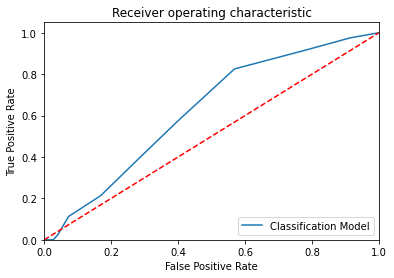

-----------------------------------------------------------------------------------------------------


In [55]:
# To build the 'Logistic Regression' model with random sampling (RandomizedSearchCV)

from sklearn.neighbors import KNeighborsClassifier

# Create model object

ModelKNN = KNeighborsClassifier(n_neighbors=16, weights='uniform', algorithm='auto', leaf_size=30, 
                                p=2, metric='manhattan', metric_params=None, n_jobs=None)

# Fit the model

ModelKNN.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelKNN.predict(x_test)

# confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelKNN.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelKNN,
           'True Positive': tp,
           'False Negative': fn, 
           'False Positive': fp, 
           'True Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
HTResults = HTResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

In [56]:
HTResults.head()

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(),7,73,20,200,0.69,0.259,0.088,0.131,0.909,-0.005,0.498295,0.498
1,"KNeighborsClassifier(metric='manhattan', n_nei...",0,80,6,214,0.713,0.0,0.0,0.0,0.973,-0.086,0.486364,0.486


# KNN - Hyperparametr tuning with GridSearchCV

In [58]:
# Hyperparameter tuning by GridSearchCV

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 

GS_grid = {'n_neighbors': [int(x) for x in np.linspace(1, 21, 20)],
           'metric': ['euclidean', 'manhattan', 'minkowski'],
           'weights': ['uniform', 'distance'],
           'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
           }

# Create object for model

ModelKNN = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, 
                                p=2, metric='minkowski', metric_params=None, n_jobs=None)

# prepare the cross-validation procedure

from sklearn.model_selection import RepeatedKFold

RKCV = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Instantiate the grid search model

Grid_search = GridSearchCV(estimator = ModelKNN, param_grid = GS_grid, cv = RKCV, n_jobs = -1, verbose = 2)

# Fit the grid search to the data

Grid_search.fit(x_train,y_train)

Fitting 30 folds for each of 480 candidates, totalling 14400 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 21],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [60]:
# Best parameter from gridseachCV

Grid_search.best_params_

{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 21,
 'weights': 'uniform'}

Confusion matrix : 
 [[  2  78]
 [  5 215]]
Outcome values : 
 2 78 5 215
Classification report : 
               precision    recall  f1-score   support

           1       0.29      0.03      0.05        80
           0       0.73      0.98      0.84       220

    accuracy                           0.72       300
   macro avg       0.51      0.50      0.44       300
weighted avg       0.61      0.72      0.63       300

Accuracy : 72.3 %
Precision : 28.6 %
Recall : 2.5 %
F1 Score : 0.046
Specificity or True Negative Rate : 97.7 %
Balanced Accuracy : 50.1 %
MCC : 0.007
roc_auc_score: 0.501


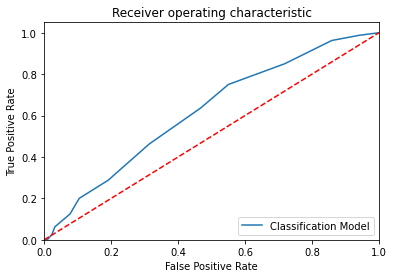

-----------------------------------------------------------------------------------------------------


In [61]:
# To build the 'Logistic Regression' model with random sampling (GridSearchCV)

from sklearn.neighbors import KNeighborsClassifier

# Create model object

ModelKNN = KNeighborsClassifier(n_neighbors=21, weights='uniform', algorithm='auto', leaf_size=30, 
                                p=2, metric='manhattan', metric_params=None, n_jobs=None)

# Fit the model

ModelKNN.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelKNN.predict(x_test)

# confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelKNN.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelKNN,
           'True Positive': tp,
           'False Negative': fn, 
           'False Positive': fp, 
           'True Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
HTResults = HTResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

In [62]:
HTResults.head()

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(),7,73,20,200,0.69,0.259,0.088,0.131,0.909,-0.005,0.498295,0.498
1,"KNeighborsClassifier(metric='manhattan', n_nei...",0,80,6,214,0.713,0.0,0.0,0.0,0.973,-0.086,0.486364,0.486
2,"KNeighborsClassifier(metric='manhattan', n_nei...",2,78,5,215,0.723,0.286,0.025,0.046,0.977,0.007,0.501136,0.501
